My grandmother always keeps saying how winters used to be colder when she was young.
She recalls frost of -20 C being normal most winters, nowadays not so much.
Let's check this.


In [1]:
import datetime
import time
from selenium import webdriver
import pandas as pd
import random
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

/usr/lib/python3/dist-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.22) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [13]:
dates = [ (f"01-{year}" , f"02-{year}" , f"12-{year}") for year in range(1936, 2018)]

In [16]:
final_dt = []

for tup in dates:
    for item in tup:
        final_dt.append(item)

In [7]:

dates[:10]

[('01-1936', '02-1936', '12-1936'),
 ('01-1937', '02-1937', '12-1937'),
 ('01-1938', '02-1938', '12-1938'),
 ('01-1939', '02-1939', '12-1939'),
 ('01-1940', '02-1940', '12-1940'),
 ('01-1941', '02-1941', '12-1941'),
 ('01-1942', '02-1942', '12-1942'),
 ('01-1943', '02-1943', '12-1943'),
 ('01-1944', '02-1944', '12-1944'),
 ('01-1945', '02-1945', '12-1945')]

In [91]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv:42.0) Gecko/20100101 Firefox/42.0'}
data = []

for date in final_dt:
    print(date)
    time.sleep(random.randint(9, 25))
    url = f"https://en.tutiempo.net/climate/{date}/ws-103840.html"
    
    r = requests.get(url, headers=headers)
    soup = BeautifulSoup(r.text, "lxml")
    table = soup.find("div", "mt5 minoverflow tablancpy")

    if table:
        for row in table.findAll('tr'):

            if not row.findAll('th'):
                day = row.findAll('td')[0].getText()
                if day == '\xa0':
                    continue
                
                temp = row.findAll('td')[3].getText()
                if not temp:
                    temp = [item.attrs['class'] for item in row.findAll('td')[3].findAll('span')]

                day = row.findAll('td')[0].getText()
                index = datetime.date(int(date[3:]), int(date[:2]), int(day))
                
                data.append( (index, temp))
                                      

        df = pd.DataFrame(data, columns=['date', 'min'])
        df.to_excel('temp_hist.xlsx')
    else:
        print("No table found for {}".format(date))


01-1936
02-1936
12-1936
01-1937
02-1937
12-1937
01-1938
02-1938
12-1938
01-1939
02-1939
12-1939
01-1940
02-1940
12-1940
01-1941
02-1941
12-1941
01-1942
No table found for 01-1942
02-1942
No table found for 02-1942
12-1942
No table found for 12-1942
01-1943
No table found for 01-1943
02-1943
No table found for 02-1943
12-1943
No table found for 12-1943
01-1944
No table found for 01-1944
02-1944
No table found for 02-1944
12-1944
No table found for 12-1944
01-1945
No table found for 01-1945
02-1945
No table found for 02-1945
12-1945
No table found for 12-1945
01-1946
No table found for 01-1946
02-1946
No table found for 02-1946
12-1946
01-1947
02-1947
12-1947
01-1948
02-1948
12-1948
01-1949
02-1949
12-1949
01-1950
02-1950
12-1950
01-1951
02-1951
12-1951
01-1952
02-1952
12-1952
01-1953
02-1953
12-1953
01-1954
02-1954
12-1954
01-1955
02-1955
12-1955
01-1956
02-1956
12-1956
01-1957
02-1957
12-1957
01-1958
02-1958
12-1958
01-1959
02-1959
12-1959
01-1960
02-1960
12-1960
01-1961
02-1961
12-196

### Data cleaninig

In [3]:
import os
os.getcwd()

'/home/scott/Documents/GitHub/data-science/data_analysis'

In [5]:
df = pd.read_pickle('files/temps.pkl')

In [7]:
def clean_codes(x):
    new = []
    if type(x) is list:
        for item in x:
            new.append(item[0])
        return new
    else:
        return x
        

In [8]:
df['min'] = df['min'].apply(clean_codes)

In [10]:
unique = []

for x in df[df['min'].apply(type) == list]['min'].tolist():
    for y in x:
        unique.append(y)

In [11]:
# https://en.tutiempo.net/climate/01-1977/ws-103840.html

set1 = {'ntfg' : '0', 
         'ntkk' : '.',
        'ntvw' : 2,
        'ntno' : 1,
         'ntef' : 3,
         'nthy' : 8,
         'ntdr' : 6,
         'ntpo' : 7,
         'ntjg' : 9,
         'ntjj' : '-',
         'ntgo' : 5,
         'ntee' : 4
        }

# https://en.tutiempo.net/climate/01-1936/ws-103840.html
set2 = {'nttu' : 2,
        'ntio' : '-',
        'ntlm' : 1,
        'ntas' : 8,
        'ntzb' : 5,
        'nthj' : 6,
        'ntbb' : 4,
        'nttn' : 9,
        'ntcd' : 3,
        'ntfs' : 7,
        'ntyc' : '.',
        'ntde' : '0'
       }

set3 = {'ntab' : '0',
        'ntux' : '.',
        'ntre' : 8,
        'ntaz' : 5,
        'ntkf' : '-',
        'nthi' : 1,
        'ntpq' : 2,
        'ntyy' : 6,
        'ntxo' : 7,
        'ntll' : 9,
        'ntxy' : 3,
        'ntgg' : 4
        
        
        
       }

set4 = {'ntzz' : '-',
        'ntaa' : 4,
        'ntvr' : '.',
        'ntjk' : 1,
        'ntgy' : 6,
        'ntqr' : 8,
        'ntza' : 3,
        'ntrs' : 2,
        'ntbz' : 5,
        'ntox' : 7,
        'ntnt' : 9,
        'ntbc' : '0'
       }

codes = [set1, set2, set3, set4]

In [12]:
def map_codes(x):
    if type(x) is list:
        for code_list in codes:
            if code_list.get(x[0], None):
                thekey = code_list
        
                return [thekey[item] for item in x]
            
    else:
        return x
    

df['min'] = df['min'].apply(map_codes)

In [14]:
def stringify(x):
    if type(x) == list:
        return [str(item) for item in x]
    else:
        return x

In [15]:
df['min'] = df['min'].apply(stringify)

In [17]:
df['min'] = df['min'].apply(lambda x: "".join(x) if type(x) == list else x)

In [100]:
df.to_pickle('temps_decyphered.pkl')

### Data Analysis

In [18]:
df = df[df['min'] != '-']

In [19]:
df['min'] = df['min'].apply(float)

In [20]:
df['min_10'] = df['min'] < -10
df['min_15'] = df['min'] < -15
df['min_20'] = df['min'] < -20

In [21]:
df['year'] = df.date.apply(lambda x: x.year)

In [22]:
gr = df.groupby('year').agg(sum).reset_index()

<BarContainer object of 54 artists>

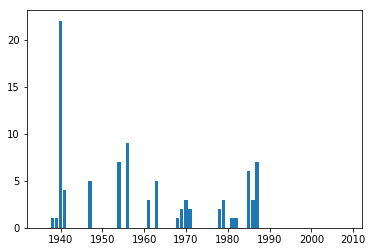

In [127]:
plt.bar(gr.year, gr.min_15)

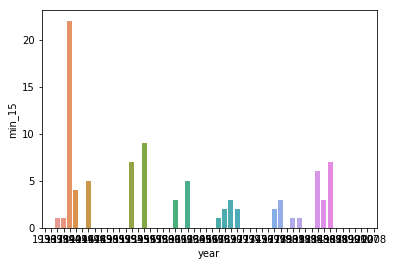

In [128]:
sns.barplot(gr.year, gr.min_15)

In [129]:
gr

,year,min,min_15,min_10,min_20
0,1936,-57.2,0.0,1.0,0.0
1,1937,-254.7,0.0,7.0,0.0
2,1938,-158.3,1.0,6.0,0.0
3,1939,-96.1,1.0,4.0,0.0
4,1940,-884.1,22.0,43.0,5.0
5,1941,-362.2,4.0,15.0,0.0
6,1946,-123.9,0.0,7.0,0.0
7,1947,-511.7,5.0,30.0,0.0
8,1948,-55.6,0.0,2.0,0.0
9,1949,53.6,0.0,0.0,0.0


In [131]:
df[df.year == 1940]

,date,min,min_15,min_10,min_20,year
361,1940-01-01,-7.2,False,False,False,1940
362,1940-01-02,-13.9,False,True,False,1940
363,1940-01-03,-8.9,False,False,False,1940
364,1940-01-04,-11.1,False,True,False,1940
365,1940-01-05,-15.0,False,True,False,1940
366,1940-01-06,-16.1,True,True,False,1940
367,1940-01-07,-12.8,False,True,False,1940
368,1940-01-08,-11.1,False,True,False,1940
369,1940-01-09,-17.8,True,True,False,1940
370,1940-01-10,-20.0,True,True,False,1940
